In [1]:
!pip install tensorflow
from tensorflow.keras.datasets.mnist import load_data

#load_data로 데이터 할당하기
(x_train, y_train), (x_test, y_test) = load_data()

#손 글씨 데이터는 이미지라 3차원 행렬
print("변경 전 = ", x_train.shape)

#3차원 행렬을 2차원으로 변경
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

#변경 결과 확인하기
print("변경 후 = ", x_train.shape)

변경 전 =  (60000, 28, 28)
변경 후 =  (60000, 784)


In [2]:
#의사결정나무 모델링하기

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#의사결정나무 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(x_train, y_train)

#의사결정나무 결과 확인하기
acc_train_dct = dct.score(x_train, y_train)
acc_test_dct = dct.score(x_test, y_test)

print(f'''학습 결과 = {acc_train_dct}, 검증 결과 = {acc_test_dct}''')


학습 결과 = 1.0, 검증 결과 = 0.8781


In [4]:
#랜덤 포레스트 모델링 및 결과 비교하기

In [6]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(x_train, y_train)

#랜덤 포레스트 결과 저장
acc_train_rfc = rfc.score(x_train, y_train)
acc_test_rfc = rfc.score(x_test, y_test)
#학습 결과 수치로 출력
print(f"""의사결정나무 : train_acc = {round(acc_train_dct, 3)}, test_acc = {round(acc_test_dct, 3)}""")
print(f"""랜덤포레스트 : train_acc = {round(acc_train_rfc, 3)}, test_acc = {round(acc_test_rfc, 3)}""")


의사결정나무 : train_acc = 1.0, test_acc = 0.878
랜덤포레스트 : train_acc = 1.0, test_acc = 0.97


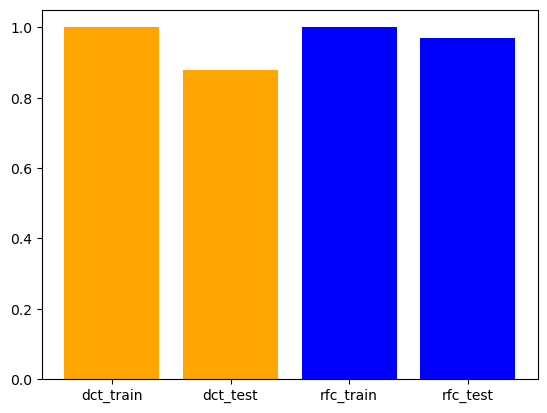

In [7]:
import matplotlib.pyplot as plt

#x축 정의하기
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test']
#y축 정의하기
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]

colors=['orange', 'orange', 'blue','blue']
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.show()

In [8]:
#의사결정나무 결과와 동일하게 랜덤 포레스트 구성하기
rft = RandomForestClassifier(random_state=0, 
                             #나무 개수를 1개로 설정
                             n_estimators=1,
                             #max_feature는 의사결정나무 기준으로 변경
                             max_features=None,
                             #부트스트랩 샘플링은 off
                             bootstrap=False,
                            )
rft.fit(x_train, y_train)

#학습 결과 저장하기
acc_train_rfc = rft.score(x_train, y_train)
acc_test_rfc = rft.score(x_test, y_test)
acc_train_dct = dct.score(x_train, y_train)
acc_test_dct = dct.score(x_test, y_test)

#의사결정나무 & 랜덤 포레스트가 유사한 결과를 출력하는지 비교
print(f"""의사결정나무 : train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct, 3)}""")
print(f"""랜덤 포레스트 : train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc, 3)}""")


의사결정나무 : train_acc = 1.0, test_acc = 0.878
랜덤 포레스트 : train_acc = 1.0, test_acc = 0.877


In [1]:
# 그래디언트 부스팅 이해하기

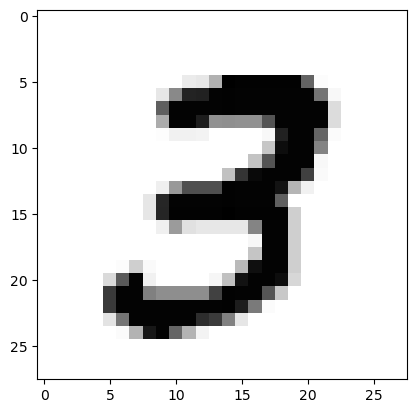

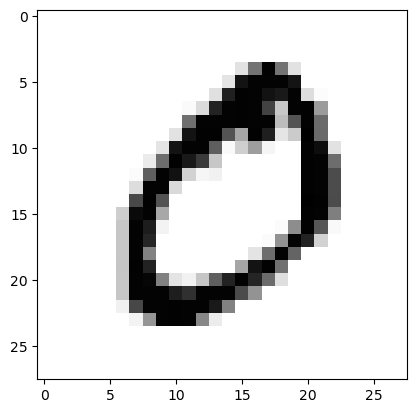

In [2]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = load_data()
#학습시간 고려해서 2000건 데이터만 사용하기
x_train=x_train[:2000]
y_train=y_train[:2000]
x_test=x_test[:2000]
y_test=y_test[:2000]

#샘플 데이터 확인하기
plt.imshow(x_train[7], cmap='Greys')
plt.show()

#샘플 데이터 확인하기
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [3]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [4]:
#알고리즘별 학습 및 결과 비교하기

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#의사결정나무 불러오기 및 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(x_train, y_train)
#의사결정나무 학습 결과 저장하기
acc_train_dct = dct.score(x_train, y_train)
acc_test_dct = dct.score(x_test, y_test)

#랜덤 포레스트 불러오기 및 학습하기
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
#랜덤 포레스트 학습 결과 저장하기
acc_train_rfc = rfc.score(x_train, y_train)
acc_test_rfc = rfc.score(x_test, y_test)

#그래디언트 부스팅 불러오기 및 학습하기
gbc = GradientBoostingClassifier(random_state=0, verbose=1)
gbc.fit(x_train,y_train)
#그래디언트 부스팅 학습 결과 저장하기
acc_train_gbc = gbc.score(x_train, y_train)
acc_test_gbc = gbc.score(x_test, y_test)

#각 알고리즘별 성능 비교하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct, 3)}""")
print(f"""랜덤 포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc, 3)}""")
print(f"""그래디언트 부스: train_acc = {round(acc_train_gbc,3)}, test_acc = {round(acc_test_gbc, 3)}""")

      Iter       Train Loss   Remaining Time 
         1           1.8398            2.24m
         2           1.5879            2.30m
         3           1.4024            2.29m
         4           1.2584            2.23m
         5           1.1338            2.19m
         6           1.0258            2.16m
         7           0.9359            2.13m
         8           0.8556            2.10m
         9           0.7863            2.08m
        10           0.7247            2.06m
        20           0.3653            1.88m
        30           0.2167            1.62m
        40           0.1423            1.38m
        50           0.0982            1.17m
        60           0.0720           56.21s
        70           0.0540           41.92s
        80           0.0410           27.87s
        90           0.0321           13.88s
       100           0.0252            0.00s
의사결정나무: train_acc = 1.0, test_acc = 0.652
랜덤 포레스트: train_acc = 1.0, test_acc = 0.874
그래디언트 부스: trai

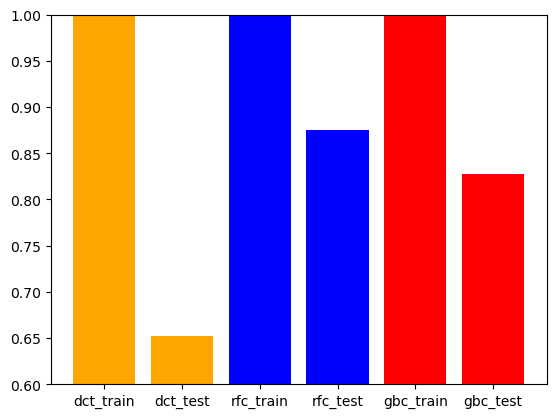

In [7]:
#비교 그래프 그리기
import matplotlib.pyplot as plt
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test', 'gbc_train', 'gbc_test',]
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc, acc_train_gbc, acc_test_gbc]
colors = ['orange', 'orange', 'blue', 'blue', 'red', 'red']
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.ylim([0.6,1.0])
plt.show()